# Casestudy MEL : DDA-TMT single cell melanoma data

This is case study DDA-TMT SCMS in  in this paper. The dataset is available at https://massive.ucsd.edu/ProteoSAFe/dataset.jsp?accession=MSV000089159. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
from matplotlib.lines import Line2D
from pgmpy.estimators import PC
import networkx as nx

# from realms import simulate

set_matplotlib_formats("svg")


/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_44495/1886566139.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


The raw spectra were identified and quantified using MaxQuant. The resulting PSMs were than processed using the methods in MSstatsTMT, including normalization across TMT mixtures using a reference channel and summarization of peptide ions into a single value per protein per channel.

### Step 1: Get pilot/historical data from past similar experiment

In [2]:
# data = pd.read_csv('SCMS/data/scmsdata.csv')
from utility import show_protein_abundance_features
protein_abundance_file = "SCMS/data/meldataclean.csv"  # Replace with the actual path
data = show_protein_abundance_features(protein_abundance_file)


FileNotFoundError: [Errno 2] No such file or directory: 'SCMS/data/meldataclean.csv'

### Step2(optional): Prior Knowledge Network creation 


The figure below shows the prior knowledge network queried from INDRA. It comprises 1300 nodes, connected by a total of 6567 directed edges.

In [5]:
# Read the structure information from the TSV file
pkn = pd.read_csv('SCMS/network/indra.tsv', sep = '\t')
# Create a directed graph
G = nx.from_pandas_edgelist(pkn, source='source_hgnc_symbol', target='target_hgnc_symbol', create_using=nx.DiGraph())

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # you can use different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')  # If you have weights on edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Prior Knowledge Network from INDRA")
plt.show()


The figure below shows the graph obtained after structure learning.  

In [6]:
# Read the structure information from the CSV file
structure_info = pd.read_csv("Learned_Structure_SCMS.csv")

# Create a directed graph
G = nx.from_pandas_edgelist(structure_info, source='from', target='to', create_using=nx.DiGraph())

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # you can use different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')  # If you have weights on edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Learned Structure")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Learned_Structure_SCMS.csv'

The figure is combined graph obtained using combination of pkn from INDRA and  structure learning using PC algorithm

<div>
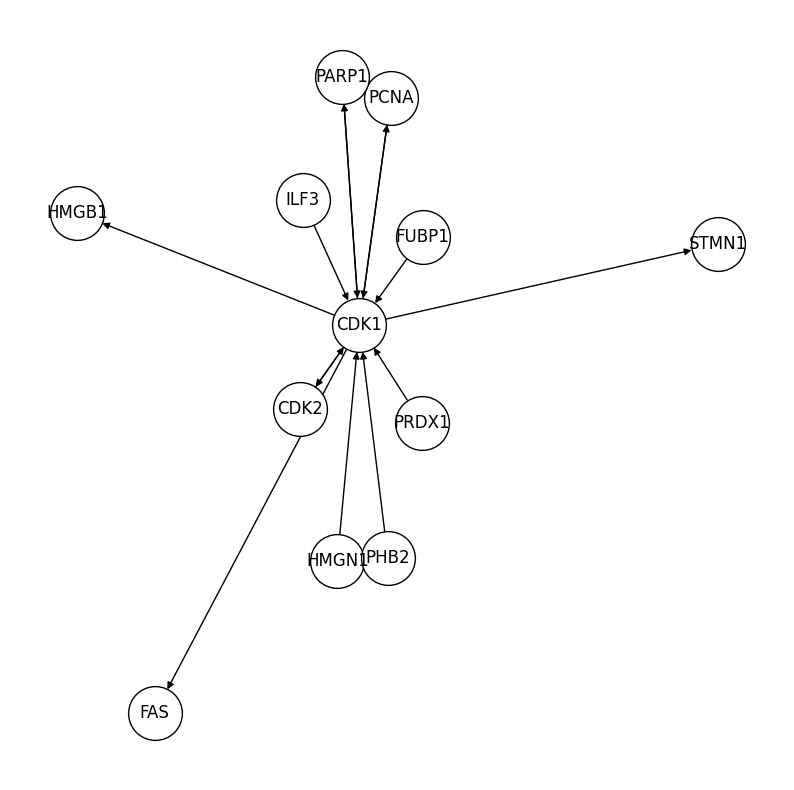
</div>


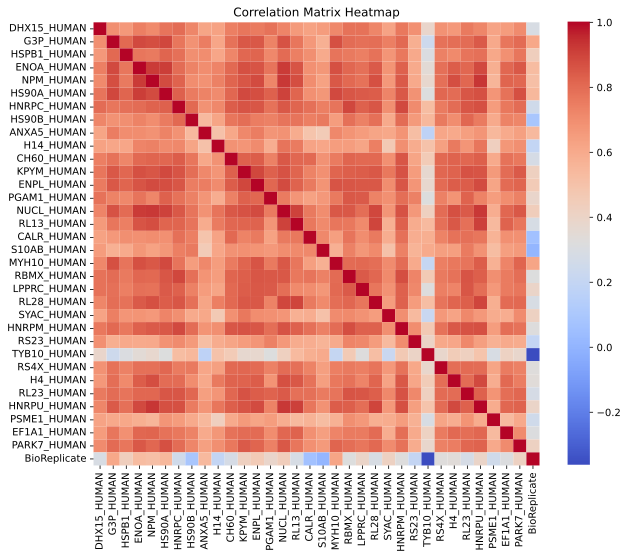

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:

corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
# Plot the highest correlated pairs
# for pair in highest_correlated_pairs.head():
#     col1, col2 = pair
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=data[col1], y=data[col2])
#     plt.title(f'Scatter Plot of {col1} vs {col2}')
#     plt.xlabel(col1)
#     plt.ylabel(col2)
#     plt.show()

In [34]:
import pandas as pd

# Assuming you have your dataset in a CSV file named 'data.csv', you can read it into a pandas DataFrame


# Compute the correlation matrix
correlation_matrix = data.corr()

# Extract upper triangular part of the correlation matrix (excluding diagonal)
upper_triangular = correlation_matrix.where(
    pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the pairs of columns with the highest correlation coefficients
highest_correlated_pairs = upper_triangular.unstack().sort_values(ascending=False).dropna()

# Get the top correlated pairs
top_correlated_pairs = highest_correlated_pairs.head(20)

# Extract the column names from the top correlated pairs
top_correlated_cols = [pair[0] for pair in top_correlated_pairs.index] + [pair[1] for pair in top_correlated_pairs.index]

# Remove duplicates and keep the unique column names
top_correlated_cols = list(set(top_correlated_cols))

# Print the list of top correlated columns
print("Top correlated columns:", top_correlated_cols)

# Filter the correlation matrix to include only the top correlated columns
correlation_matrix_top = correlation_matrix.loc[top_correlated_cols, top_correlated_cols]

# Print out the correlation matrix for the top correlated columns
print("\nCorrelation matrix for top correlated columns:")
print(correlation_matrix_top)


Top correlated columns: ['NUCL_HUMAN', 'ENPL_HUMAN', 'NPM_HUMAN', 'HS90A_HUMAN', 'HNRPM_HUMAN', 'MYH10_HUMAN', 'RL13_HUMAN', 'RL28_HUMAN', 'HNRPU_HUMAN', 'KPYM_HUMAN', 'ENOA_HUMAN', 'HNRPC_HUMAN', 'G3P_HUMAN', 'RBMX_HUMAN']

Correlation matrix for top correlated columns:
             NUCL_HUMAN  ENPL_HUMAN  NPM_HUMAN  HS90A_HUMAN  HNRPM_HUMAN  \
NUCL_HUMAN     1.000000    0.880464   0.925387     0.902705     0.866351   
ENPL_HUMAN     0.880464    1.000000   0.878124     0.877184     0.855253   
NPM_HUMAN      0.925387    0.878124   1.000000     0.878374     0.844530   
HS90A_HUMAN    0.902705    0.877184   0.878374     1.000000     0.849583   
HNRPM_HUMAN    0.866351    0.855253   0.844530     0.849583     1.000000   
MYH10_HUMAN    0.848020    0.859521   0.847333     0.884571     0.794580   
RL13_HUMAN     0.901621    0.822451   0.875422     0.814884     0.824839   
RL28_HUMAN     0.892879    0.850176   0.871820     0.835646     0.824511   
HNRPU_HUMAN    0.922906    0.878229   0.9264

/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_31927/2229610576.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))


In [13]:
import utility
import numpy as np
import pandas as pd

# Set up dictionaries to store min and max accuracies for each sample size

filepath = 'melmissingless/'
rdata = data
# Set the sample sizes
sample_sizes = [5,10,20,30,40,50,60,70,80,90,100]
print("Per-protein")
min_accuracies = []
max_accuracies = []
accuracies = []
# Call the function for each sample size
for sample_size in sample_sizes:
    simulated_data0_pp = pd.read_csv(filepath+'perprotein/combined_train0.csv')
    simulated_data1_pp = pd.read_csv(filepath+'perprotein/combined_train1.csv')
    # Add a condition column
    simulated_data0_pp['Condition'] = 0
    simulated_data1_pp['Condition'] = 1

    # Concatenate the datasets
    simulated_data = pd.concat([simulated_data0_pp, simulated_data1_pp], ignore_index=True)
#         simulated_data = rdata
    # Run your analysis (e.g., Random Forest)
    accuracy, mina, maxa = utility.run_random_forest(simulated_data, sample_size, rdata,False)

    accuracies.append(accuracy)
    
    min_accuracies.append(mina)
    max_accuracies.append(maxa) 

    print(f'Sample Size: {sample_size}, Average Accuracy: {accuracy:.4f}, Min Accuracy: {mina:.4f}, Max accuracy: {maxa:.4f}')


Per-protein


KeyError: "['Condition'] not found in axis"

## Step 3: Simulating realistic data using copula model 

In [14]:
dataset = df_with_0
# dataset = egf
from copulas.multivariate import GaussianMultivariate

for i in range(100):
    model = utility.simulatecopula(dataset)
    synthetic = utility.sample(model,len(dataset))
#     synthetic.to_csv('crc/copula/crc0_gm_copula_'+str(i)+'.csv',index=False)


NameError: name 'df_with_0' is not defined

## Step 4: Evaluating realism

#### Visual Metrics

In [ ]:
import plotly.express as px
# df = px.data.tips()
df = sim
fig = px.histogram(df, x="CP" , color="Condition",facet_col="Method",
                  marginal="box", histnorm='probability density')
fig.show()

#### Statistical Metrics

#### Machine Learning Efficacy

#### Similarity Score

## Step 5: Selecting sample size appropriate for downstream application

#### Class Prediction

##### Class Discovery

##### Class Comparison

##### Scalability analysis